In [0]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = False

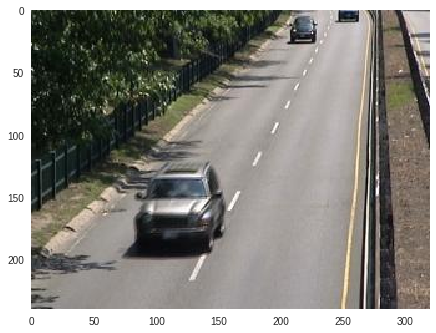

In [0]:
image = cv2.imread('background.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

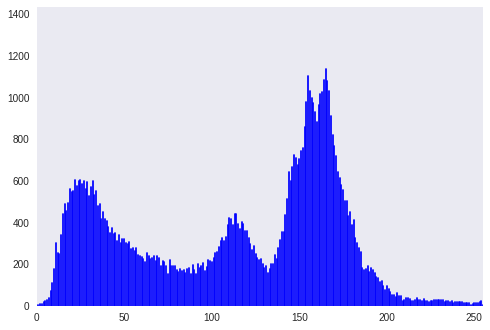

In [0]:
'''
Write a function that computes the histogram of the given. Do not use specific Python
functions for histogram computation (like hist).
'''

hist = []

for i in range(256):
    hist.append(0)

for i in range(len(gray)):
    for j in range(len(gray[i])):
        hist[gray[i][j]] += 1

plt.axis([0,255,0,max(hist)+300])        
for i in range(256):
    plt.plot([i,i], [0, hist[i]], color = "blue")

plt.show()

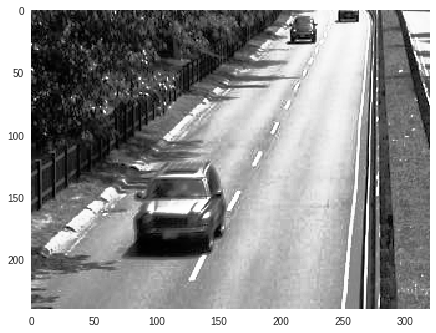

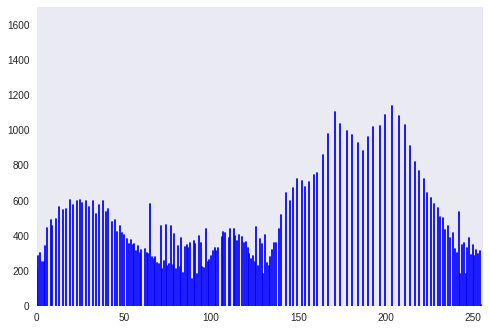

In [0]:
'''
Write a function that performs histogram equalization (see lecture notes or course book).
Use your own function, but do not use functions like cv2.equalizeHist();
'''

def get_frequencies(gray):
    hist = []

    for i in range(256):
        hist.append(0)

    for i in range(len(gray)):
        for j in range(len(gray[i])):
            hist[gray[i][j]] += 1
	
    return hist
  

freq = get_frequencies(gray)

total_pixels = sum(freq)
norm = []
for i in range(0, 256):
    norm.append(freq[i]/total_pixels)

    
new_img = np.zeros((len(image),len(image[0]),3), np.uint8)

for i in range(len(gray)):
    for j in range(len(gray[i])):
        pixel_val = 0
			
        for k in range(0, gray[i][j]+1):
            pixel_val += norm[k]
			
        pixel_val *= 255
        new_img[i][j] = pixel_val
            
cv2.imwrite('histogram-equalization.png', new_img)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()
freq = get_frequencies(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY))

plt.axis([0, 256, 0, 1.5*max(freq)])
	
for i in range(256):
    plt.plot([i, i], [0, freq[i]], color = "blue")
	
plt.show()

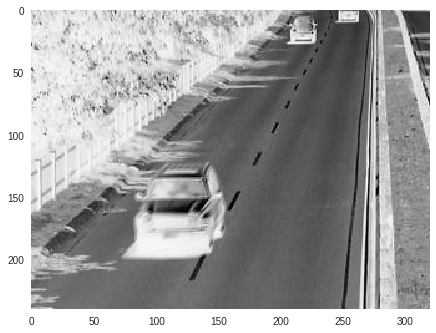

In [0]:
output = gray.copy()
output = 255 - output

plt.imshow(output, cmap = "gray")

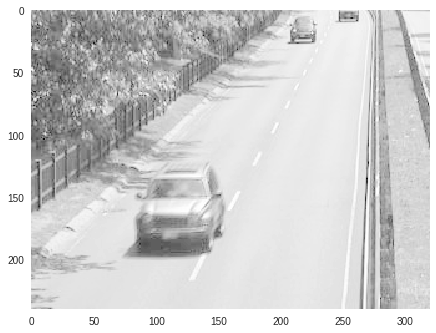

In [0]:
output = gray.copy()
max_val = np.max(gray)

c = 255/math.log(1 + max_val)

for i in range(len(output)):
	for j in range(len(output[i])):
		output[i][j] = c * math.log(1 + output[i][j])

plt.imshow(output, cmap = "gray")

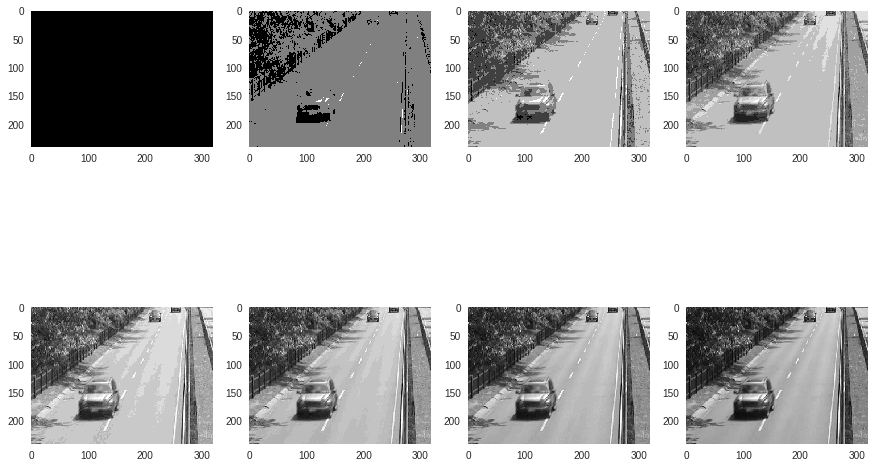

In [0]:
plt.figure(figsize = (15,10))

for gamma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    output = gray.copy()
    
    for i in range(len(output)):
        for j in range(len(output[i])):
            output[i][j] = output[i][j] ** gamma
    
    plt.subplot(2, 4, gamma*10)
    plt.imshow(output, cmap = "gray")

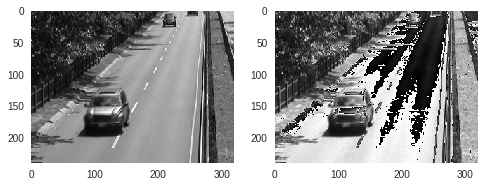

In [0]:
'''
Perform contrast stretching on the given and display original image as well as resultant
image in the same frame.
'''

freq = []

for i in range(256):
    freq.append(0)

for i in range(len(gray)):
    for j in range(len(gray[i])):
        freq[gray[i][j]] += 1

new_img = np.zeros((len(gray),len(gray[0])), np.uint8)
	
xmin = 256
xmax = -1
    
for i in range(256):
    if(freq[i] != 0 and i < xmin):
        xmin = i
        
    if(freq[i] != 0 and i > xmax):
        xmax = i
            
min_freq = min(freq)
max_freq = max(freq)
	
for i in range(256):
    if(freq[i] == min_freq):
        ymin = i
		
    if(freq[i] == max_freq):
        ymax = i
	
denom = ymax - ymin
num = xmax - xmin
factor = num/denom

for i in range(len(gray)):
    for j in range(len(gray[i])):
        new_img[i][j] = factor * (gray[i][j]-ymin) + xmin
	        
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap = "gray")

plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap = "gray")

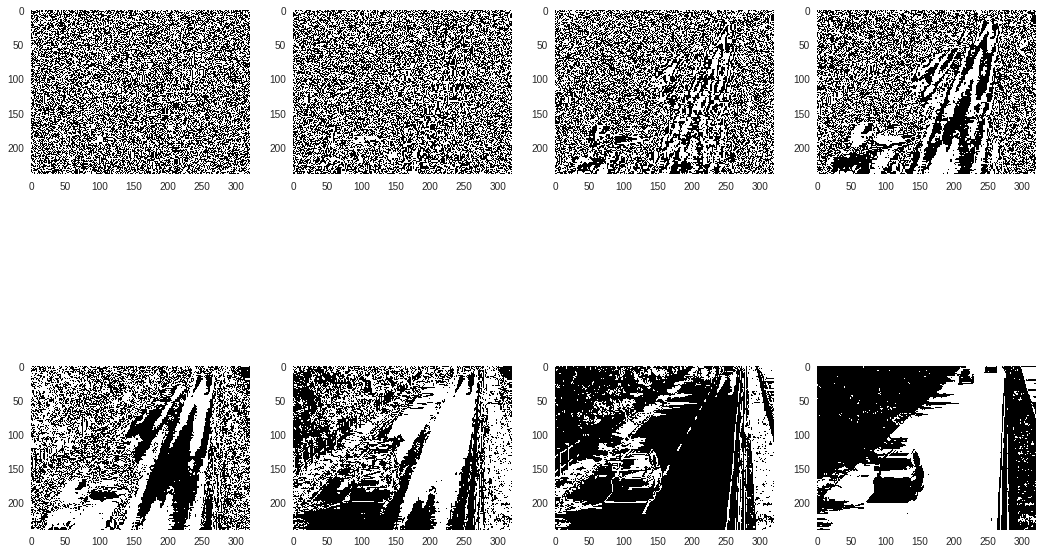

In [0]:
plt.figure(figsize = (18, 12))

binary = []

def decimalToBinary(x):
	ans = ""
	for i in range(8):
		ans += str(x%2)
		x //= 2
	return ans[::-1]

for i in range(len(gray)):
    binary.append([])
    for j in range(len(gray[i])):
        binary[i].append(decimalToBinary(gray[i][j]))
	
for bit in range(7,-1,-1):
    new_img = np.zeros((len(gray), len(gray[0])), np.uint8)
		
    for i in range(len(gray)):
        for j in range(len(gray[i])):
            if(binary[i][j][bit] == '1'):
                new_img[i][j] = 255
            else:
                new_img[i][j] = 0
        
    plt.subplot(2, 4, 8-bit)
    plt.imshow(new_img, cmap = "gray")